<a href="https://colab.research.google.com/github/manyasahay/Computer-Vision/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim : To track moving objects using GMM

In [2]:
import numpy as np
import cv2
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [6]:
cap = cv2.VideoCapture('/content/traffic.avi')
frames = []
frame_count=0
while True:
    ret, frame = cap.read()
    if frame is not None:
      frame = cv2.resize(frame, (100, 100))
      frame_count+=1
      frames.append(frame)
    else:
        break
cap.release()


In [7]:
frame_count

120

In [8]:
frames

[array([[[ 12,  18,   8],
         [ 10,  16,   6],
         [  9,  15,   5],
         ...,
         [141, 130, 121],
         [217, 206, 197],
         [182, 171, 162]],
 
        [[  9,  16,   6],
         [ 10,  17,   7],
         [ 12,  19,   9],
         ...,
         [ 97,  86,  79],
         [164, 153, 144],
         [147, 136, 127]],
 
        [[ 12,  20,  10],
         [ 12,  20,  10],
         [ 12,  20,  10],
         ...,
         [ 93,  83,  76],
         [ 51,  40,  31],
         [ 48,  37,  28]],
 
        ...,
 
        [[ 76,  70,  60],
         [ 78,  72,  62],
         [ 81,  75,  65],
         ...,
         [167, 205, 214],
         [ 56, 102, 116],
         [ 86, 106, 113]],
 
        [[ 75,  69,  59],
         [ 76,  70,  60],
         [ 80,  74,  64],
         ...,
         [177, 212, 221],
         [ 81, 128, 142],
         [ 71, 100, 106]],
 
        [[ 74,  68,  58],
         [ 76,  70,  60],
         [ 80,  73,  63],
         ...,
         [156, 190, 200],
  

In [11]:
frames = np.array(frames)

In [12]:
frames.shape

(120, 100, 100, 3)

array([[[ 10,  16,   6],
        [ 10,  16,   6],
        [  8,  14,   4],
        ...,
        [155, 156, 141],
        [150, 152, 136],
        [136, 141, 124]],

       [[  8,  14,   4],
        [  8,  14,   4],
        [  8,  14,   4],
        ...,
        [155, 156, 141],
        [151, 154, 137],
        [140, 144, 128]],

       [[  8,  14,   4],
        [  8,  14,   4],
        [  9,  15,   5],
        ...,
        [153, 155, 140],
        [152, 154, 138],
        [146, 148, 132]],

       ...,

       [[ 65,  63,  54],
        [ 68,  66,  57],
        [ 69,  67,  58],
        ...,
        [155, 192, 204],
        [ 44,  94, 111],
        [ 82, 103, 102]],

       [[ 66,  62,  54],
        [ 68,  64,  55],
        [ 70,  66,  57],
        ...,
        [165, 199, 210],
        [ 71, 121, 139],
        [ 64,  96,  95]],

       [[ 65,  60,  52],
        [ 67,  62,  54],
        [ 68,  63,  55],
        ...,
        [143, 176, 188],
        [ 84, 136, 153],
        [ 56,  93,  92]]], dtype=uint8)
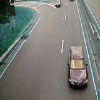

In [13]:
frames[50]

In [16]:
sh = frames[0]
row,col,ch = sh.shape


In [17]:
gmm = GaussianMixture(n_components=3)

In [19]:
background = np.zeros((sh.shape))

In [20]:
for r in range(row):
  for c in range(col):
    for k in range(ch):
      temp = frames[:,r,c,k]
      temp = temp.reshape(temp.shape[0],1)
      gmm.fit(temp)
      means = gmm.means_
      weights = gmm.weights_
      i = np.argmax(weights)
      background[r][c][k] = int(means[i][0])

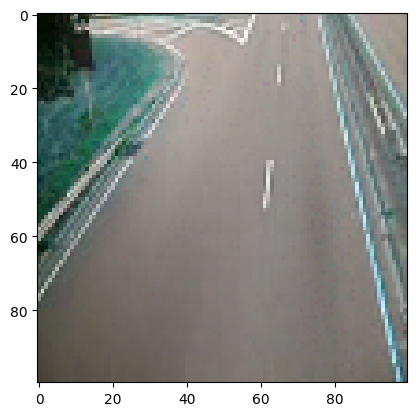

In [21]:
b3 = background
b3 = b3/np.max(b3)
plt.imshow(b3)


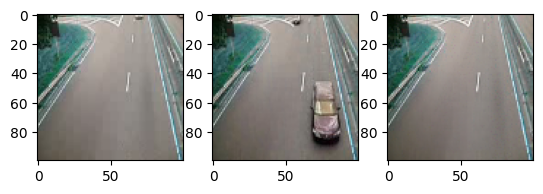

In [23]:
plt.subplot(1,3,1)
plt.imshow(frames[0])
plt.subplot(1,3,2)
plt.imshow(frames[50])
plt.subplot(1,3,3)
plt.imshow(b3)


Text(0.5, 1.0, 'foreground')

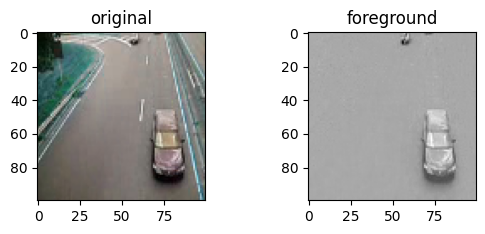

In [35]:
plt.subplot(2,2,1)
plt.imshow(frames[50])
plt.title('original')
frame1 = frames[50]
foreground = rgb2gray(frame1) - rgb2gray(b3)
plt.subplot(2,2,2)
plt.imshow(foreground,cmap='gray')
plt.title('foreground')

## Using 5 gaussian distributions

In [32]:
sh = frames[0]
row,col,ch = sh.shape
background = np.zeros((sh.shape))

In [33]:
gmm = GaussianMixture(n_components=5)

In [36]:
for r in range(row):
  for c in range(col):
    for k in range(ch):
      temp = frames[:,r,c,k]
      temp = temp.reshape(temp.shape[0],1)
      gmm.fit(temp)
      means = gmm.means_
      weights = gmm.weights_
      i = np.argmax(weights)
      background[r][c][k] = int(means[i][0])

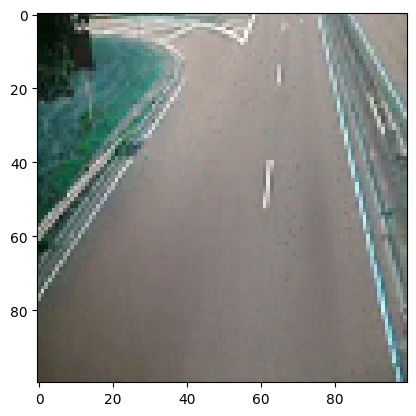

In [37]:
b3 = background
b3 = b3/np.max(b3)
plt.imshow(b3)

Text(0.5, 1.0, 'foreground with n=5')

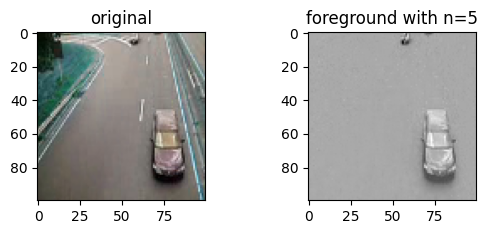

In [38]:
plt.subplot(2,2,1)
plt.imshow(frames[50])
plt.title('original')
frame1 = frames[50]
foreground = rgb2gray(frame1) - rgb2gray(b3)
plt.subplot(2,2,2)
plt.imshow(foreground,cmap='gray')
plt.title('foreground with n=5')

Conclusion: First, we started by using n=3 and compred it with n=5. We notice that there is no considerable difference in the foreground, n=3 is better for this case. If n is 1, road and steady objects would be observed in the foreground.